***
**Introduction to Machine Learning** <br>
__[https://slds-lmu.github.io/i2ml/](https://slds-lmu.github.io/i2ml/)__
***

# Exercise sheet 5: Evaluation 1

In [24]:
#| label: import
# Consider the following libraries for this exercise sheet:

library(ggplot2)
library(mlr3)
library(mlr3learners)

## Exercise 1: Evaluating regression learners

Imagine you work for a data science start-up and sell turn-key statistical models. Based on a set of training
data, you develop a regression model to predict a customer’s legal expenses from the average monthly number of
indictments brought against their firm.

a) Due to the financial sensitivity of the situation, you opt for a very flexible learner that fits the customer’s data ($n_{train} = 50$ observations) well, and end up with a degree-21 polynomial (blue, solid). Your colleague is skeptical and argues for a much simpler linear learner (gray, dashed). Which of the models will have a lower empirical risk if standard $L2$ loss is used?

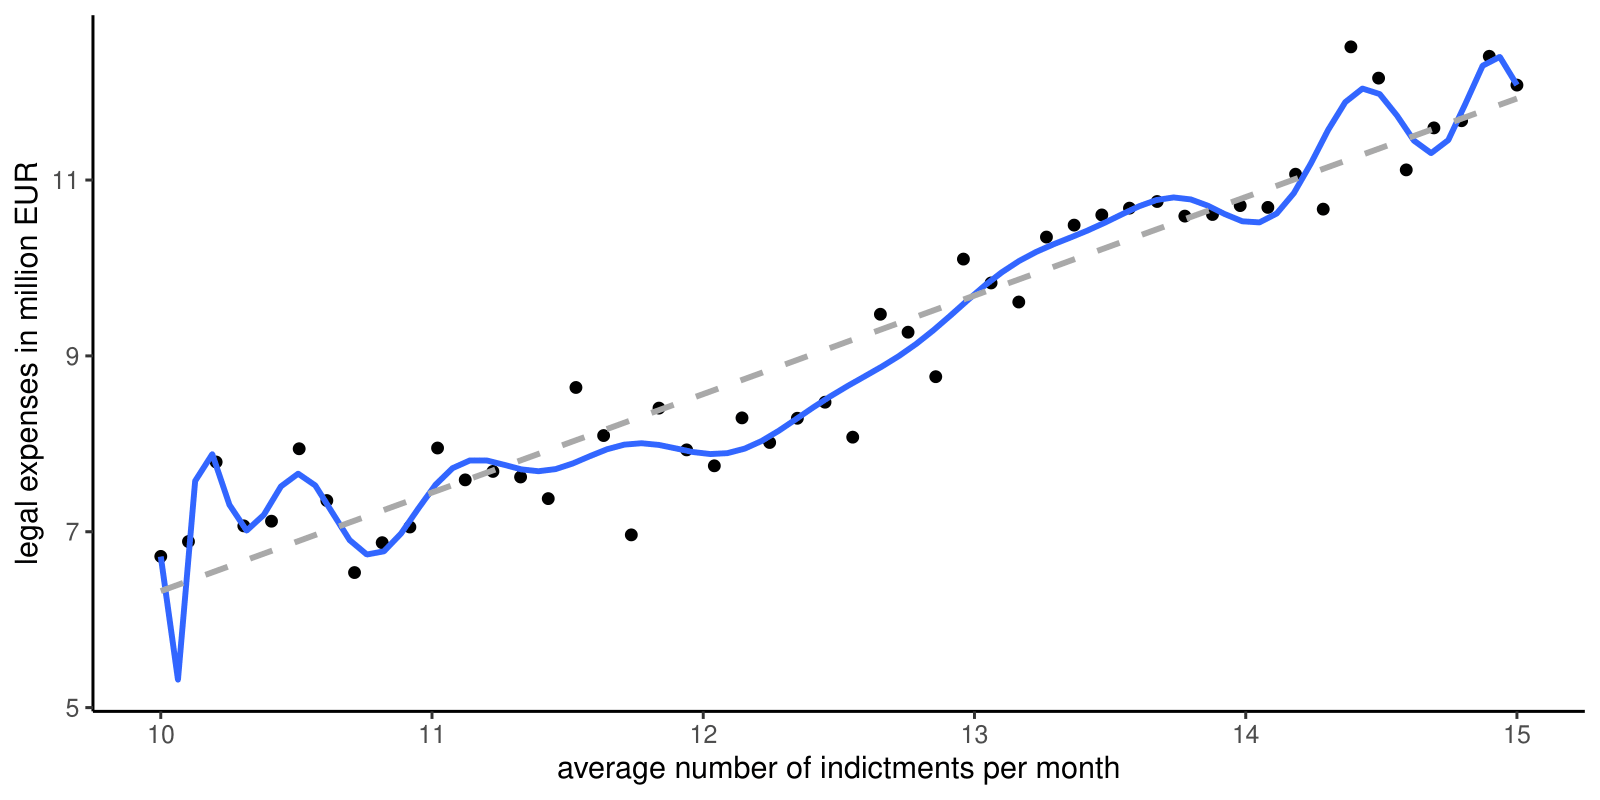

> **\# Enter your answer here:**


b) Why might evaluation based on training error not be a good idea here?

> **\# Enter your answer here:**


c) Evaluate both learners using

  >i. mean squared error (MSE), and

  >ii. mean absolute error (MAE).

State your performance assessment and explain potential differences.
Use the code below to create the training and test points.

In [1]:
#| label: legal-data

set.seed(123)
x_train <- seq(10, 15, length.out = 50)
y_train <- 10 + 3 * sin(0.15 * pi * x_train) + rnorm(length(x_train), sd = 0.5)
data_train <- data.frame(x = x_train, y = y_train)
set.seed(321)
x_test <- seq(10, 15, length.out = 10)
y_test <- 10 + 3 * sin(0.15 * pi * x_test) + rnorm(length(x_test), sd = 0.5)
data_test <- data.frame(x = x_test, y = y_test)

In [ ]:
# Enter your code here:

## Exercise 2: Importance of train-test split

We consider the `CaliforniaHousing` data for which we would like to predict the median house value (`MedHouseVal`) from
the median income in the neighborhood (`MedInc`).

In [27]:
#| label: cali-data
# Adapt to version available on sklearn following description from 
# https://gist.github.com/bgreenwell/b1330460eec5acf1c81fae71902e331c

setwd(tempdir())
url <- "https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz"
download.file(url, destfile = "cal.tar.gz")
untar("cal.tar.gz")

# Read the data into R and provide column names
df_california <- read.csv("CaliforniaHousing//cal_housing.data", header = FALSE)
columns_index <- c(9, 8, 3, 4, 5, 6, 7, 2, 1)
df_california <- df_california[, columns_index]
names(df_california) <- c(
    "MedValue", 
    "MedInc", 
    "HouseAge", 
    "AveRooms",
    "AveBedrms", 
    "Population", 
    "AveOccup", 
    "Latitude",
    "Longitude"
)
df_california$MedValue <- df_california$MedValue / 100000
df_california <- df_california[, c("MedInc", "MedValue")]
head(df_california)

,MedInc,MedValue
,<dbl>,<dbl>
1,8.3252,4.526
2,8.3014,3.585
3,7.2574,3.521
4,5.6431,3.413
5,3.8462,3.422
6,4.0368,2.697


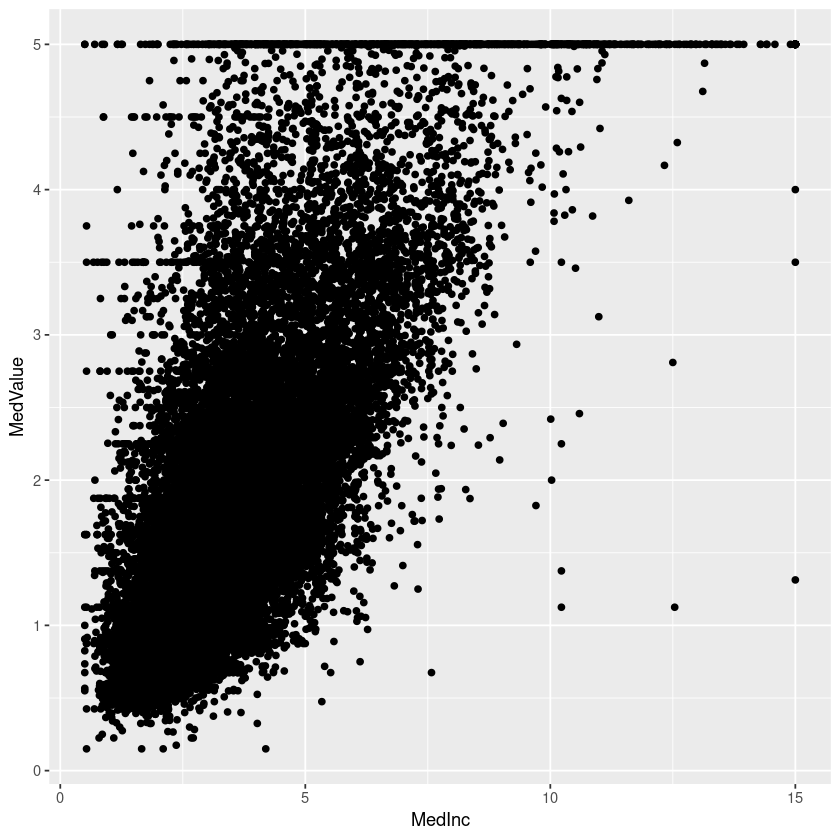

In [26]:
#| label: cali-scatterplot-r

ggplot(dataset_california, aes(x = MedInc, y = MedValue)) +
    geom_point()

a) Use the first 100 observations as training data to compute a linear model and evaluate the performance of your learner on the remaining data using MSE.

In [ ]:
# Enter your code here:

b) What might be disadvantageous about the train-test split in a)?

> **\# Enter your answer here:**


c) Now, sample your training observations from the data set at random. Use a share of $0.1$ through $0.9$, in $0.1$ steps, of observations for training and repeat this procedure ten times. Afterwards, plot the resulting test errors (in terms of MSE) in a suitable manner.

<div class="alert alert-block alert-info">
    <b>R Hint:</b> <code>rsmp</code> is a convenient function for splitting data – you will want to choose the ”holdout” strategy. Afterwards, resample can be used to repeatedly fit the learner.<br>
</div>

In [ ]:
# Enter your code here:

d)  Interpret the findings from c).

> **\# Enter your answer here:**
